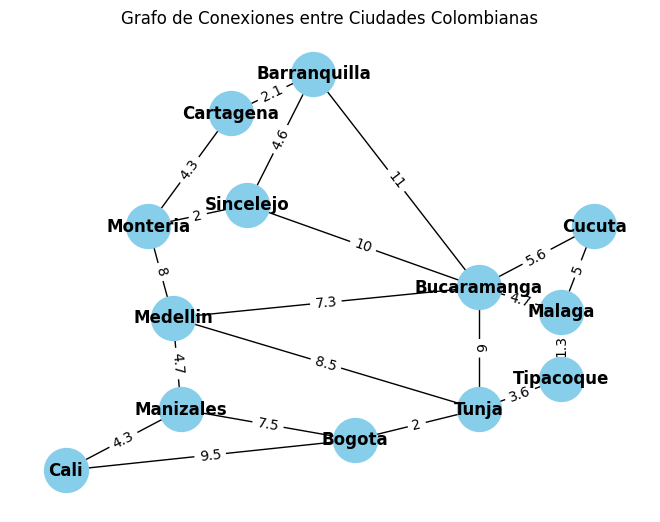

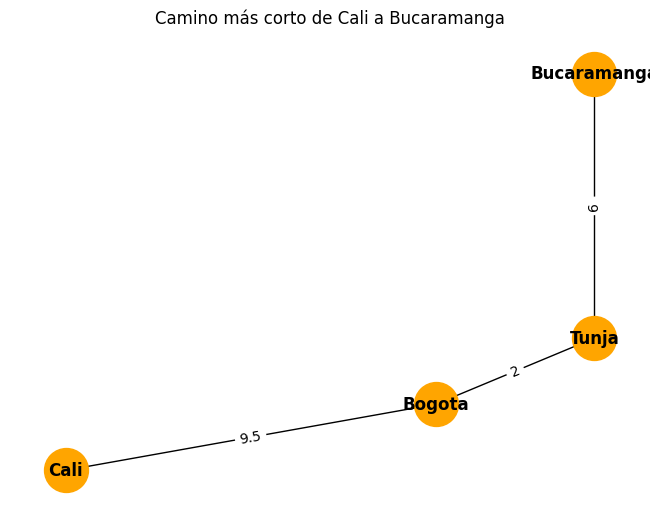

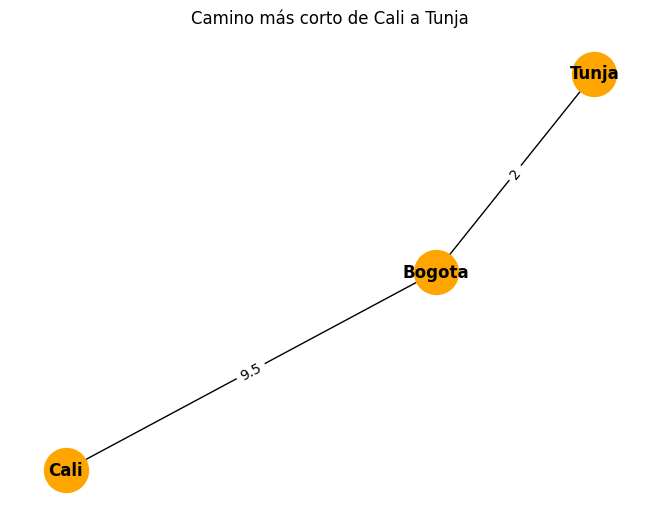

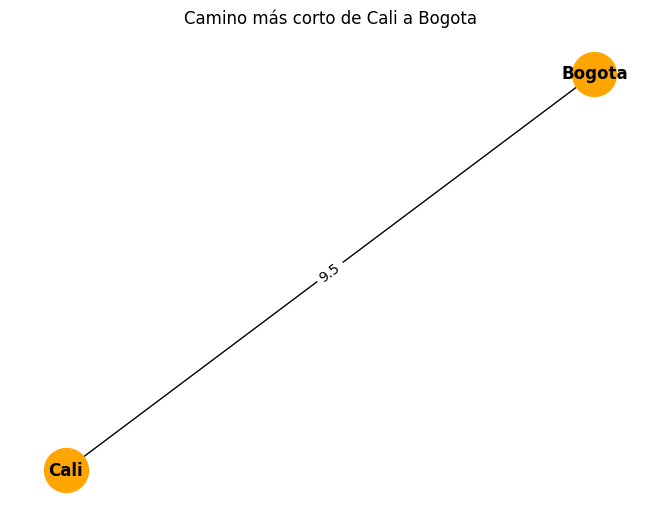

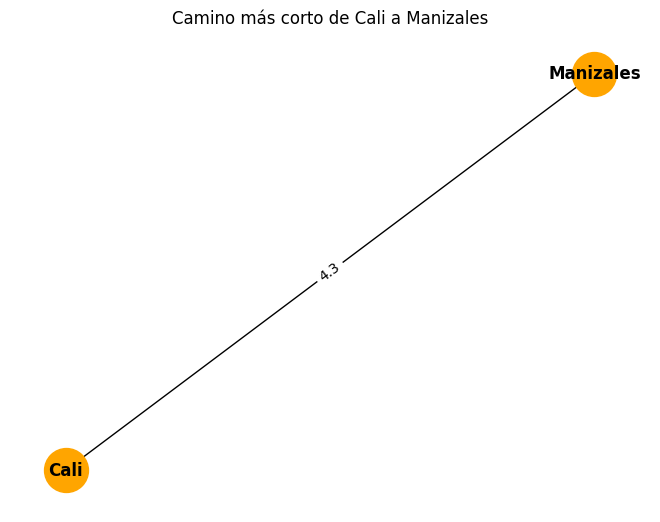

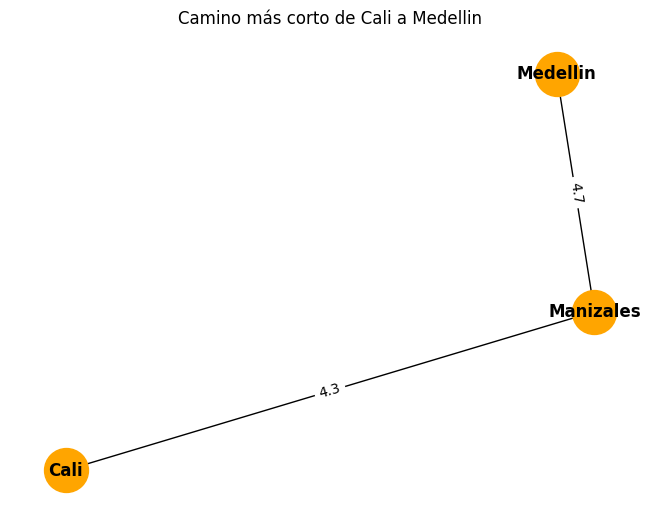

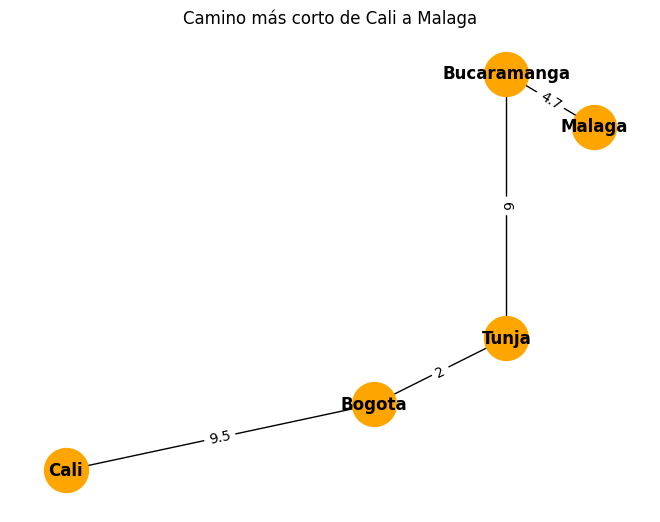

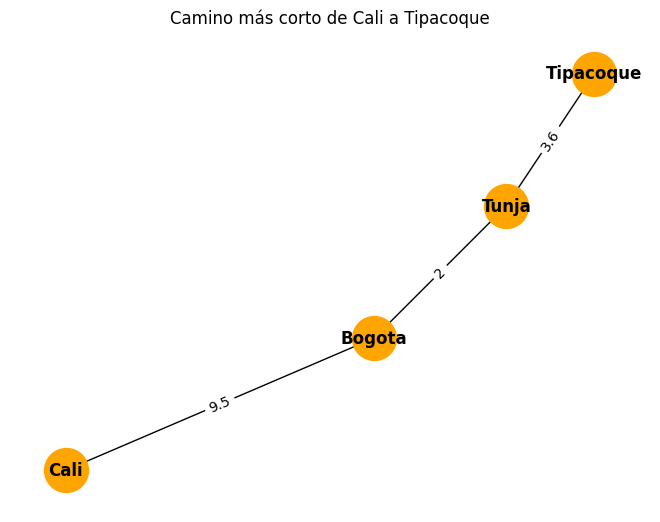

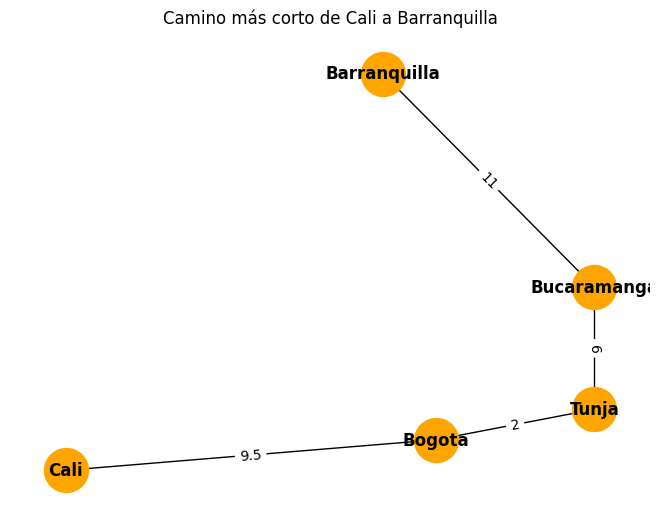

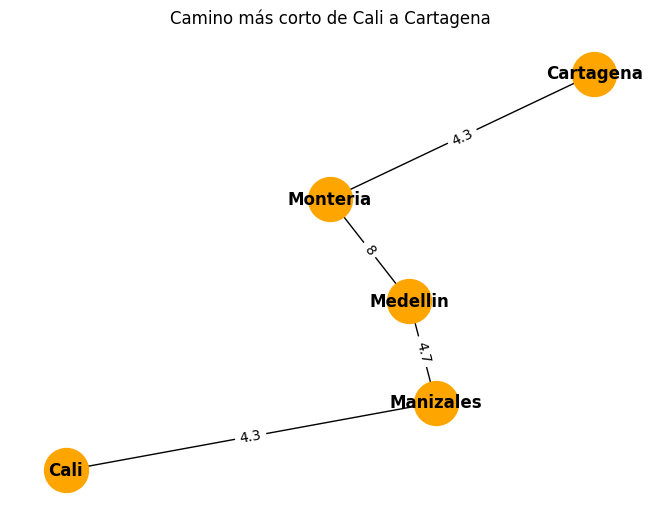

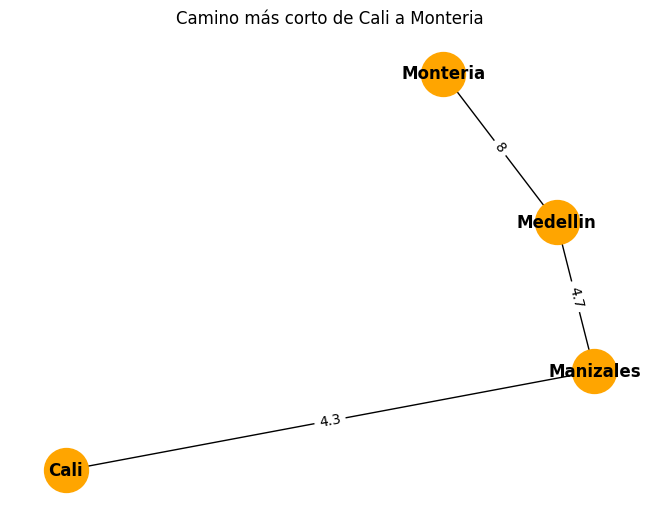

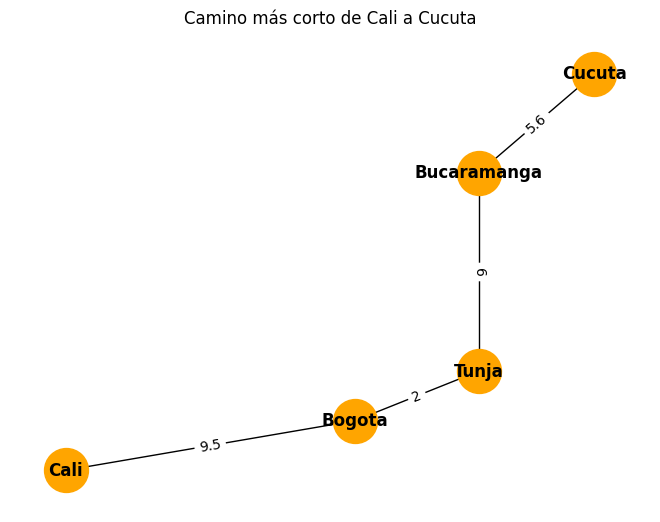

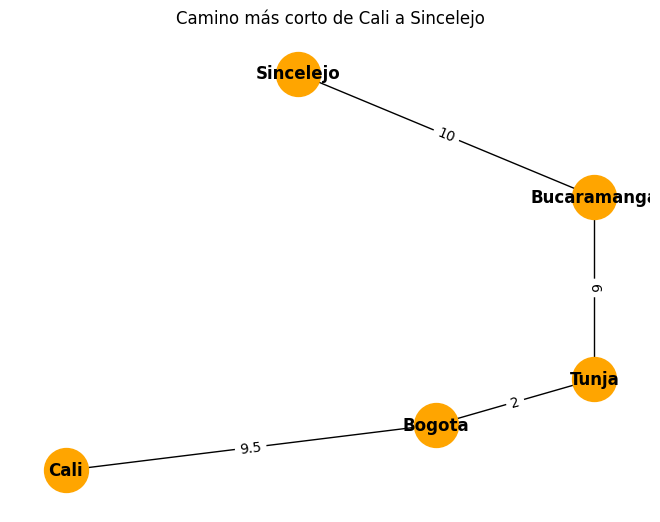

In [17]:
# Importación de las librerias que se van a utilizar
import networkx as nx
import matplotlib.pyplot as plt

# Función para crear el grafo
def crear_grafo():
    # Lista de ciudades
    ciudades = [
        "Bucaramanga", "Tunja", "Bogota", "Manizales", "Medellin", "Cali",
        "Malaga", "Tipacoque", "Barranquilla", "Cartagena", "Monteria", "Cucuta", "Sincelejo"
    ]

    # Diccionario de tiempos de viaje entre ciudades
    tiempos_viaje = {
        # Tuplas con ciudades como llave y tiempo como valor
        ("Bucaramanga", "Tunja"): 6,
        ("Bucaramanga", "Malaga"): 4.7,
        ("Bucaramanga", "Cucuta"): 5.6,
        ("Bucaramanga", "Sincelejo"): 10,
        ("Sincelejo", "Monteria"): 2,
        ("Bucaramanga", "Barranquilla"): 11,
        ("Bucaramanga", "Medellin"): 7.3,
        ("Cucuta", "Malaga"): 5,
        ("Cartagena", "Monteria"): 4.3,
        ("Barranquilla", "Cartagena"): 2.1,
        ("Sincelejo", "Barranquilla"): 4.6,
        ("Bogota", "Tunja"): 2,
        ("Bogota", "Cali"): 9.5,
        ("Bogota", "Manizales"): 7.5,
        ("Tipacoque", "Malaga"): 1.3,
        ("Tipacoque", "Tunja"): 3.6,
        ("Cali", "Manizales"): 4.3,
        ("Medellin", "Tunja"): 8.5,
        ("Medellin", "Monteria"): 8,
        ("Medellin", "Manizales"): 4.7
    }

    # Diccionario de posiciones de las ciudades para visualización
    posiciones = {
        # Nombre de la ciudad: coordenadas (x, y)
        "Bucaramanga": (5, 6),
        "Tunja": (5, 2),
        "Bogota": (3.5, 1),
        "Manizales": (1.4, 2),
        "Medellin": (1.3, 5),
        "Cali": (0, 0),
        "Malaga": (6, 5.2),
        "Tipacoque": (6, 3),
        "Barranquilla": (3, 13),
        "Cartagena": (2, 11.7),
        "Monteria": (1, 8),
        "Cucuta": (6.4, 8),
        "Sincelejo": (2.2, 8.7)
    }


    # Crear un grafo vacío
    G = nx.Graph()

    # Agregar nodos al grafo
    for ciudad in ciudades:
        G.add_node(ciudad, pos=posiciones[ciudad])

    # Agregar aristas (con pesos) al grafo
    for edge, weight in tiempos_viaje.items():
        ciudad_a, ciudad_b = edge
        G.add_edge(ciudad_a, ciudad_b, weight=weight)

    return G, posiciones, tiempos_viaje

# Función para obtener el camino más corto desde una ciudad de origen a todas las demás ciudades
def obtener_camino_corto(origen, G):
    caminos = {}
    for ciudad in G.nodes:
        if ciudad != origen:
            try:
                camino_corto = nx.shortest_path(G, origen, ciudad)
                caminos[ciudad] = camino_corto[1:]  # Excluir el origen en el camino
            except nx.NetworkXNoPath:
                caminos[ciudad] = None
    return caminos

# Función para mostrar los caminos más cortos desde una ciudad de origen a todas las demás ciudades
def mostrar_caminos_desde_origen(origen, G, posiciones, tiempos_viaje):
    caminos = obtener_camino_corto(origen, G)

    for ciudad, camino in caminos.items():
        if camino:
            # Crear un subgrafo con el camino más corto
            G_camino = G.subgraph([origen] + camino)

            # Obtener las etiquetas de las aristas del camino
            edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G_camino.edges(data=True)}

            # Mostrar grafo del camino corto
            nx.draw(G_camino, pos=posiciones, with_labels=True, node_size=1000, node_color='orange', font_weight='bold')
            nx.draw_networkx_edge_labels(G_camino, pos=posiciones, edge_labels=edge_labels, font_color='black')
            plt.title(f'Camino más corto de {origen} a {ciudad}')
            plt.show()
            print("\n")  # Agregar un espacio entre gráficos
        else:
            print(f"No hay una ruta definida en este grafo para ir de {origen} a {ciudad}")

# Obtener el grafo y datos necesarios
G, posiciones, tiempos_viaje = crear_grafo()

# Mostrar grafo original
nx.draw(G, pos=posiciones, with_labels=True, node_size=1000, node_color='skyblue', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=posiciones, edge_labels=tiempos_viaje)
plt.title('Grafo de Conexiones entre Ciudades Colombianas')
plt.show()
print("\n")  # Agregar un espacio entre gráficos

# Definir ciudad de origen
ciudad_origen = "Cali"

# Mostrar camino más corto desde Bucaramanga a todas las demás ciudades
mostrar_caminos_desde_origen(ciudad_origen, G, posiciones, tiempos_viaje)